**<h1> Accelerating Insights: A Data-Driven Look at Vehicle Fuel Efficiency and Design </h1>**

This dataset provides a comprehensive view of vehicle specifications and performance metrics, offering valuable insights into fuel efficiency, engine characteristics, and design trends across various car models and manufacturers. It includes information about fuel consumption in city, highway, and combined driving conditions, alongside key attributes like engine size, transmission type, and drivetrain configuration.

The dataset spans multiple vehicle classes, from compact cars to SUVs, and includes models from well-known manufacturers, with data ranging from older to newer models. By analyzing this data, we aim to uncover patterns and relationships that influence fuel efficiency, such as the impact of engine displacement, transmission type, and drivetrain on miles per gallon (mpg). Additionally, it can provide insights into trends over time, such as improvements in fuel efficiency or shifts in consumer preferences for vehicle types.


<div align="center" style=" font-size: 30%; text-align: center; margin: 0 auto">
<img src="https://cdn.thezebra.com/zfront/media/production/images/8xzyovqA.width-800.jpg" width="800" height="400" />
</div>

## **1.Introduction**

#### *1.1 Problem Statement*


In today’s world, fuel efficiency has become a top priority for customers who are looking to save on fuel costs and minimize their environmental footprint. The challenge lies in identifying the most fuel-efficient car models across various vehicle classes while uncovering the key factors that impact fuel economy. By tackling this issue, we can provide valuable insights to both manufacturers and consumers, helping them understand how different features—like engine size, drivetrain, and transmission—affect fuel efficiency. This understanding can guide manufacturers in designing more efficient vehicles and empower consumers to make smarter, more eco-friendly purchasing decisions.



#### *1.2 Objectives*

- 1.2.1 __Identify Fuel-Efficient Vehicles__

    - The goal is to identify the standout car models that excel in fuel efficiency. By ranking vehicles based on their combination MPG, the most eco-friendly options within each vehicle class can be uncovered, providing valuable insights for consumers looking to make smarter, greener choices..

- 1.2.2 __Analyze Key Factors Influencing Fuel Efficiency__

    - This analysis will explore how key factors—such as engine displacement, the number of cylinders, drivetrain, transmission type, and fuel type—affect fuel efficiency. Understanding these elements will reveal the underlying factors that contribute to better fuel economy.

- 1.2.3 __Class-Based Analysis__

    - Each vehicle class has its own efficiency leaders. By comparing the fuel efficiency of different types of vehicles, such as midsize cars and SUVs, the top performers within each category will be highlighted, helping consumers choose the best option for their needs.

- 1.2.4 __Explore Yearly Trends__

    - Examining data from 2014 to 2024, this analysis will track the progress of fuel efficiency, uncovering how technological advancements and design improvements have contributed to more fuel-efficient vehicles, and offering insights into the future of eco-friendly driving.   



## **2.Importing Dataset**

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('car_data.csv')

df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


##### *2.1 Describing the dataset*

In [3]:
# overview of structure and datatypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB



The dataset consists of 550 entries, but some columns appear to contain missing values

In [4]:
# describing the dataset statistics
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


The extremely high mpg values (126 mpg for city_mpg and 112 mpg for combination_mpg) might suggest either a data entry error or the inclusion of specialized vehicles (e.g., highly efficient hybrids or EVs).

## **3.Data Cleaning**


##### *3.1 Checking and Handling Missing values*

In [5]:
# rows with missing values
rows_missing_val = df.isnull().any(axis=1)
unclean_df = df[rows_missing_val]

# total number of rows with missing values
num_records_missing = rows_missing_val.sum()

print("number of records of with missing values: ", num_records_missing)


number of records of with missing values:  2


In [6]:
# Count missing values in each column
missing_values_per_column = df.isnull().sum()
print("Columns and their count of missing values")
print(missing_values_per_column)

Columns and their count of missing values
city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64



Having identified 2 rows with missing data, removing them is unlikely to result in a significant loss of information required for analysis or modeling

In [7]:
# removing null values
df_cleaned = df.dropna()

# rows with missing values
rows_missing_val = df_cleaned.isnull().any(axis=1)
unclean_df = df_cleaned[rows_missing_val]

# total number of rows with missing values
num_records_missing = rows_missing_val.sum()

print("number of records of with missing values: ", num_records_missing)

number of records of with missing values:  0


In [8]:
# Count missing values in each column
missing_values_per_column = df_cleaned.isnull().sum()
print(missing_values_per_column)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


### *3.2 Checking for duplicate entries*

In [9]:
# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Count the number of duplicate rows
duplicate_count = df_cleaned.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicate rows: 2
Duplicate rows:
     city_mpg                        class  combination_mpg  cylinders  \
117        28  small sport utility vehicle               31        4.0   
119        27  small sport utility vehicle               29        4.0   

     displacement drive fuel_type  highway_mpg   make     model transmission  \
117           1.8   fwd       gas           34  honda  hr-v 2wd            a   
119           1.8   awd       gas           32  honda  hr-v 4wd            a   

     year  
117  2016  
119  2016  


In [10]:
# Remove duplicate rows
df_cleaned = df_cleaned.copy()
df_cleaned.drop_duplicates(inplace=True)



After removing duplicate rows with identical values across all columns, it was observed that additional duplicate entries exist where the records differ in the year column or exhibit slight, insignificant variations in the mpg-related columns. These discrepancies lead to redundancy in the dataset. To address this, only the most recent record for each duplicate entry will be retained, as it represents the latest available information about the car

In [11]:
# Identify rows in 'df_cleaned' that have duplicate values based on the specified subset of columns.
duplicates = df_cleaned[df_cleaned.duplicated(subset=['displacement', 'model', 'make','transmission','cylinders'], keep=False)]# The 'keep=False' parameter ensures that all duplicate rows are marked

# Sort the identified duplicates by the specified columns for better organization and clarity.
duplicate_df= duplicates.sort_values(by=['make', 'model', 'transmission','displacement'])

duplicate_df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
178,24,compact car,27,4.0,2.0,awd,gas,31,audi,a4 quattro,a,2017
204,24,compact car,27,4.0,2.0,awd,gas,34,audi,a4 quattro,a,2018
114,20,midsize car,24,6.0,3.0,awd,gas,29,audi,a6 quattro,a,2016
143,25,midsize car,30,6.0,3.0,awd,diesel,38,audi,a6 quattro,a,2016
25,13,two seater,16,10.0,5.2,awd,gas,22,audi,r8,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
69,21,compact car,24,4.0,2.0,awd,gas,28,subaru,wrx,m,2015
180,20,compact car,23,4.0,2.0,awd,gas,27,subaru,wrx,m,2017
206,21,compact car,23,4.0,2.0,awd,gas,27,subaru,wrx,m,2018
70,17,compact car,19,4.0,2.5,awd,gas,23,subaru,wrx,m,2015


In [12]:
# Sort the 'duplicate_df' DataFrame by the 'year' column in descending order,This ensures that the most recent records appear first.
duplicate_df = duplicate_df.sort_values(by='year', ascending=False)

# Remove duplicate rows from the 'df_cleaned' based on the specified subset of columns:
df_cleaned = df_cleaned.drop_duplicates(subset=['displacement', 'model', 'make','transmission','cylinders'], keep='first')

df_cleaned

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
538,28,subcompact car,31,4.0,2.0,fwd,gas,38,mini,cooper s hardtop 2 door,a,2024
540,28,subcompact car,31,4.0,2.0,fwd,gas,38,mini,cooper s hardtop 4 door,a,2024
542,26,subcompact car,29,4.0,2.0,fwd,gas,35,mini,john cooper works hardtop 2 door,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024


In [13]:
# Check the number of rows before and after
print("Number of rows before:", len(df))
print("Number of rows after:", len(df_cleaned))

Number of rows before: 550
Number of rows after: 390


### *3.3 Handling unrealistic values*

In [14]:
df_cleaned.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,20.825641,23.425641,5.438462,3.027436,27.882051,2018.330769
std,5.634576,5.444118,1.778205,1.303699,5.289213,2.955684
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,5.000000,2.500000,27.000000,2018.000000
75%,24.000000,26.000000,6.000000,3.600000,31.000000,2021.000000
max,55.000000,52.000000,12.000000,6.800000,52.000000,2024.000000


Initially, when reviewing the dataset statistics, there were unrealistically high maximum values for city_mpg and combination_mpg. However, these anomalies appear to have been associated with rows containing missing values, as they disappeared after the removal of rows with missing data

## **4.Exploratory Data Analysis**

##### *4.1 Identify Top 3 Fuel-Efficient vehicles with each class*

C:\Users\lebo\AppData\Local\Temp\ipykernel_2776\3273251744.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_data, x='make/model', y='combination_mpg', ax=axes[i], palette='Blues_d')
C:\Users\lebo\AppData\Local\Temp\ipykernel_2776\3273251744.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_data, x='make/model', y='combination_mpg', ax=axes[i], palette='Blues_d')
C:\Users\lebo\AppData\Local\Temp\ipykernel_2776\3273251744.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_data, x='make/model', y='combi

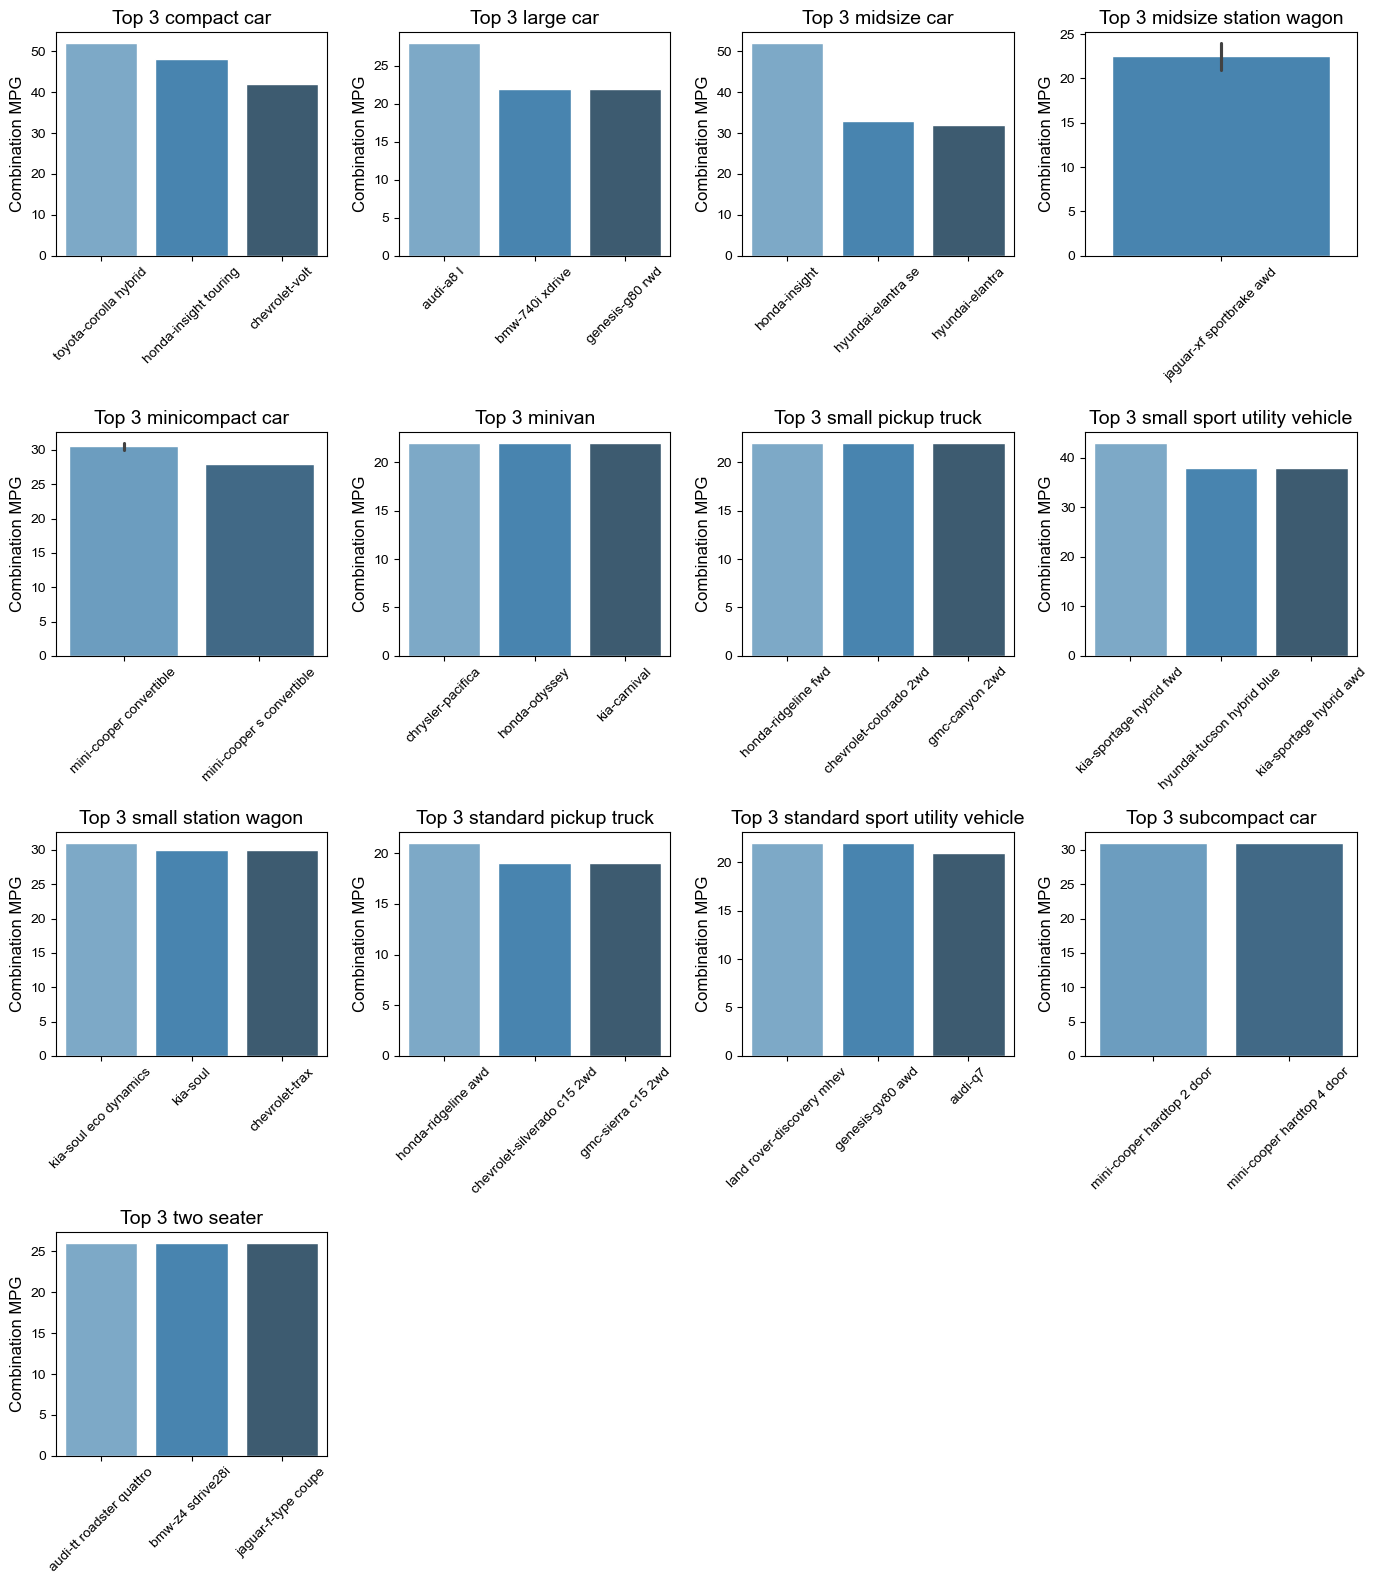

In [ ]:

# Rank vehicles within each class based on combination_mpg (descending order).
df_cleaned['rank'] = df_cleaned.groupby('class')['combination_mpg'].rank(method='first', ascending=False)

# Filter for the top-ranked vehicle(s) within each class.
top_3_class = df_cleaned[df_cleaned['rank'] <= 3].sort_values(by=['class', 'rank'])

# concatenate make and model to form new column make/model
top_3_class['make/model'] = top_3_class['make'].astype(str) + '-' + top_3_class['model'].astype(str)

# columns to retain
top_3_class_columns = ['rank','class','make/model','combination_mpg']

# new df using columns list
top_3_class = top_3_class[top_3_class_columns]

# delete rank column on oringinal df
df_cleaned = df_cleaned.drop('rank', axis=1)

# extract car classes
classes = top_3_class['class'].unique()

# Create subplots with an appropriate number of rows and 4 columns
num_classes = len(classes)
cols = 4  # Set 4 columns per row
rows = (num_classes // cols) + (num_classes % cols > 0)  # Adjust rows to fit all classes
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))  

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Set the style using Seaborn
sns.set(style="whitegrid")

# Plot the data for each class
for i, car_class in enumerate(classes):
    # Filter data for the specific class and sort by rank
    class_data = top_3_class[top_3_class['class'] == car_class].sort_values(by='rank')
    
    # Plot using seaborn's barplot for better aesthetics
    sns.barplot(data=class_data, x='make/model', y='combination_mpg', ax=axes[i], palette='Blues_d')
    axes[i].set_title(f"Top 3 {car_class}", fontsize=14)
    axes[i].set_ylabel("Combination MPG", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].set_xlabel('')  # Hide x-axis label

# Hide any unused axes if the grid has more subplots than classes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Each bar graph represents a car class along with its top 3 car models based on the dataset. If a class contains fewer than 3 car models, the bar graph will display only the available models.

##### *4.2 Key Factors Influencing Fuel Efficiency*

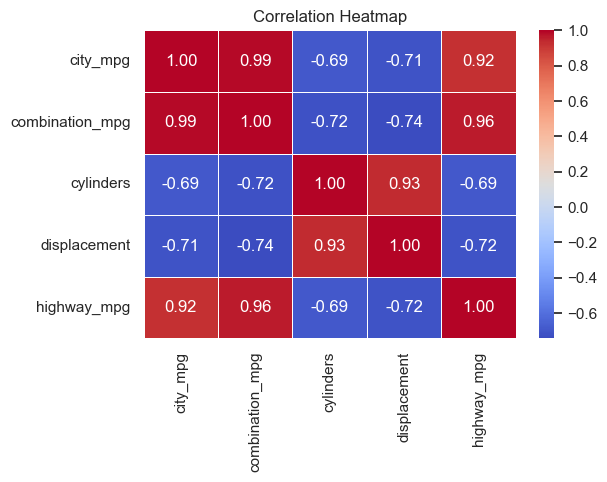

In [16]:
# Convert categorical columns to numerical values
df_numeric = df_cleaned.select_dtypes(include='number')

# drop year column
df_numeric = df_numeric.drop(columns='year')

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The data reveals a negative correlation between fuel consumption and the number of cylinders and engine displacement, suggesting that larger engines tend to be less fuel-efficient. Additionally, there is a strong correlation between city mpg, highway mpg, and combined mpg, indicating that vehicles with better fuel efficiency in one area (city or highway) tend to perform similarly in others. However, this correlation doesn't provide clear insight into which driving condition (city or highway) consumes more fuel.

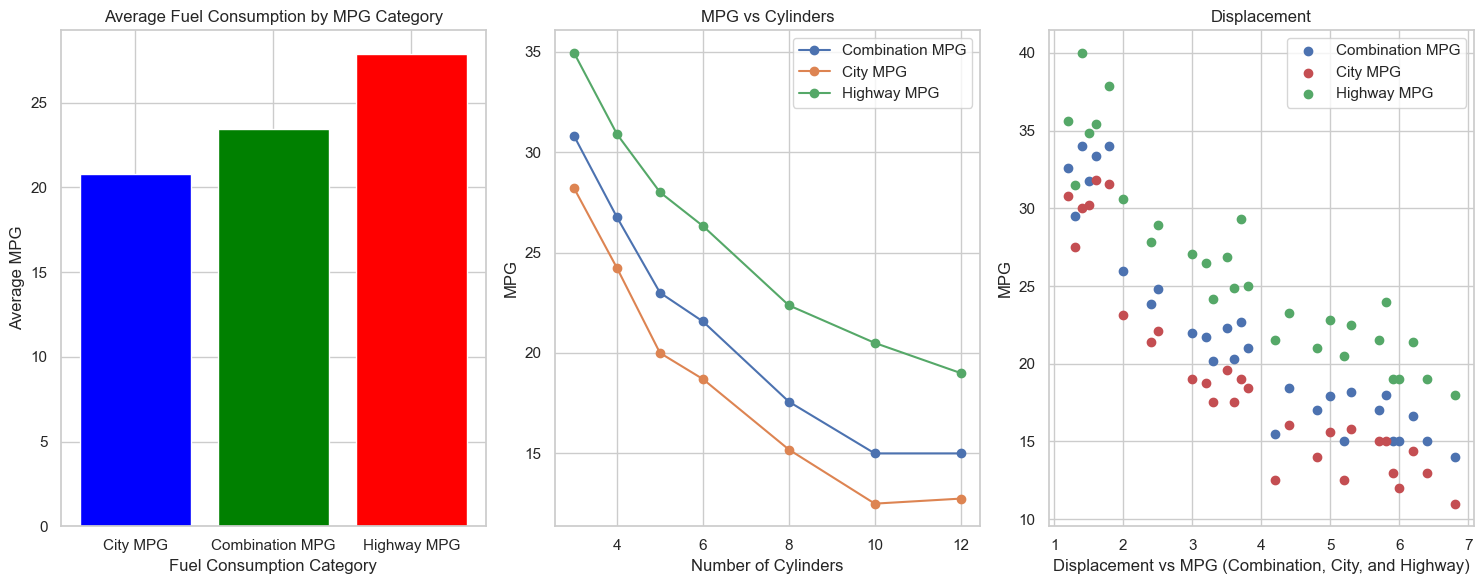

In [ ]:
# Calculate the average for each column
avg_city_mpg = df_cleaned['city_mpg'].mean()
avg_combination_mpg = df_cleaned['combination_mpg'].mean()
avg_highway_mpg = df_cleaned['highway_mpg'].mean()

# Compare the fuel consumption by looking at the averages
fuel_consumption = {
    'City MPG': avg_city_mpg,
    'Combination MPG': avg_combination_mpg,
    'Highway MPG': avg_highway_mpg
}


# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# First subplot: Bar plot of average MPG by category
axes[0].bar(fuel_consumption.keys(), fuel_consumption.values(), color=['blue', 'green', 'red'])
axes[0].set_title('Average Fuel Consumption by MPG Category')
axes[0].set_ylabel('Average MPG')
axes[0].set_xlabel('Fuel Consumption Category')


# Calculate average MPG by number of cylinders
mpg_by_clyinders = df_cleaned.groupby('cylinders')[['combination_mpg','city_mpg','highway_mpg']].mean().reset_index()

# Second subplot: Line plot of MPG vs cylinders
axes[1].plot(mpg_by_clyinders['cylinders'], mpg_by_clyinders['combination_mpg'], marker='o', label='Combination MPG')
axes[1].plot(mpg_by_clyinders['cylinders'], mpg_by_clyinders['city_mpg'], marker='o', label='City MPG')
axes[1].plot(mpg_by_clyinders['cylinders'], mpg_by_clyinders['highway_mpg'], marker='o', label='Highway MPG')
axes[1].set_title('MPG vs Cylinders')
axes[1].set_xlabel('Number of Cylinders')
axes[1].set_ylabel('MPG')
axes[1].legend()
axes[1].grid(True)


# Calculate average MPG by displacement
disp_group = df_cleaned.groupby('displacement')[['combination_mpg','city_mpg','highway_mpg']].mean().reset_index()

# Third subplot: Scatter plot of displacement vs MPG
axes[2].scatter(disp_group['displacement'], disp_group['combination_mpg'], color='b', label='Combination MPG')
axes[2].scatter(disp_group['displacement'], disp_group['city_mpg'], color='r', label='City MPG')
axes[2].scatter(disp_group['displacement'], disp_group['highway_mpg'], color='g', label='Highway MPG')
axes[2].set_title('Displacement')
axes[2].set_ylabel('MPG')
axes[2].set_xlabel('Displacement vs MPG (Combination, City, and Highway)')

# Show the legend
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


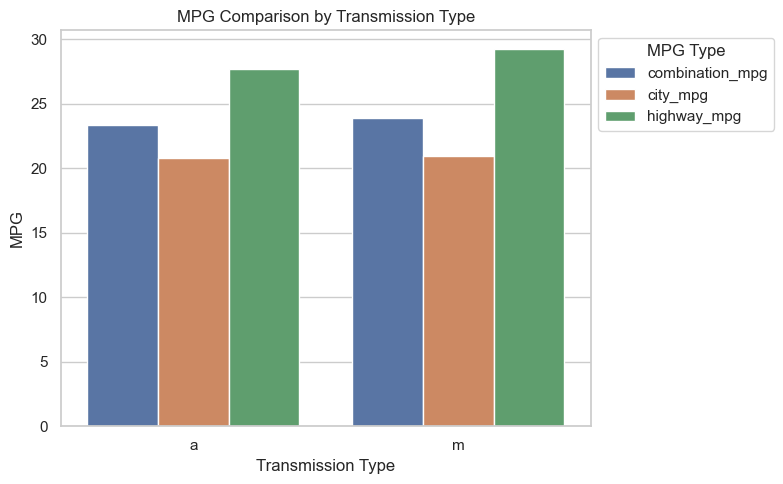

In [ ]:
# Calculate the average MPG values grouped by transmission type
fuel_by_transmission = df_cleaned.groupby('transmission')[['combination_mpg','city_mpg','highway_mpg']].mean().reset_index()

# Reshape the dataframe for plotting
df_melted = fuel_by_transmission.melt(id_vars='transmission', value_vars=['combination_mpg', 'city_mpg', 'highway_mpg'],
                     value_name='mpg')

# Plotting using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x='transmission', y='mpg', hue='variable')

# Adding titles and labels
plt.title('MPG Comparison by Transmission Type')
plt.ylabel('MPG')
plt.xlabel('Transmission Type')

# Customize the legend
plt.legend(title='MPG Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


There is not much noticeable difference in fuel efficiency between the 2 different transmission types

In [ ]:
# Filter the dataframe based on specific conditions
filtered_df = df_cleaned[(df_cleaned['cylinders'] == 4) & (df['displacement'] == 2.0) & 
                 (df_cleaned['make'].isin(['bmw', 'volkswagen','mazda','honda','toyota']))]

# Drop duplicates, keeping only the first entry per make
filtered_df = filtered_df.drop_duplicates(subset='make').reset_index()

# Display the filtered dataframe
filtered_df[['class','make','model','cylinders','displacement','city_mpg','highway_mpg','combination_mpg']]

C:\Users\lebo\AppData\Local\Temp\ipykernel_2776\2001884542.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df_cleaned[(df_cleaned['cylinders'] == 4) & (df['displacement'] == 2.0) &


,class,make,model,cylinders,displacement,city_mpg,highway_mpg,combination_mpg
0,small sport utility vehicle,mazda,cx-5 2wd,4.0,2.0,26,34,29
1,two seater,bmw,z4 sdrive28i,4.0,2.0,22,32,26
2,compact car,toyota,corolla,4.0,2.0,31,40,34
3,small sport utility vehicle,volkswagen,atlas,4.0,2.0,21,24,22


The table above shows four popular car makes with the same number of cylinders and displacement, but the fuel consumption varies. For example, the Volkswagen Atlas has lower fuel consumption compared to the other makes, suggesting that factors such as car size or whether a car is a hybrid may also influence fuel consumption.

### *4.3 Class-Based Analysis*

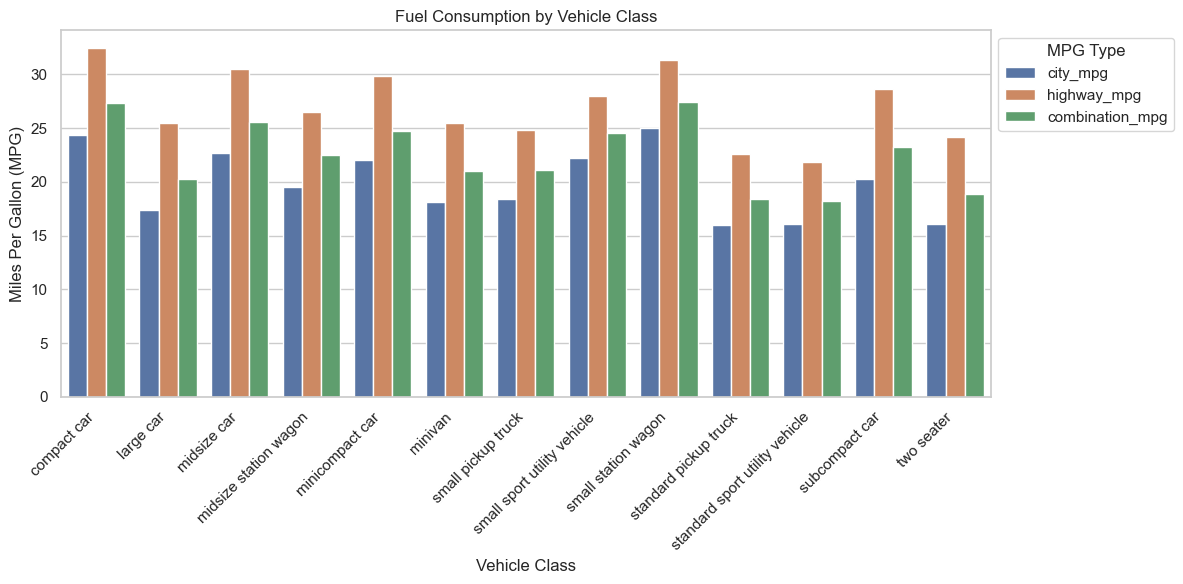

In [358]:
class_df = df_cleaned.groupby('class')[['combination_mpg','city_mpg','highway_mpg']].mean().reset_index()

# Melt the DataFrame to long format
df_long = pd.melt(class_df, id_vars=['class'], value_vars=['city_mpg', 'highway_mpg', 'combination_mpg'],
                  var_name='MPG_Type', value_name='MPG')

# Create a side-by-side bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='class', y='MPG', hue='MPG_Type')

# Customize the plot
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Miles Per Gallon (MPG)')
plt.xticks(rotation=45, ha='right')

plt.legend(title='MPG Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


Highway driving achieves the highest miles per gallon across all vehicle classes, followed by combined driving. While compact cars are more fuel-efficient on the highway, small station wagons excel in fuel efficiency when driven in the city.

### *4.4 Explore Yearly Trends*

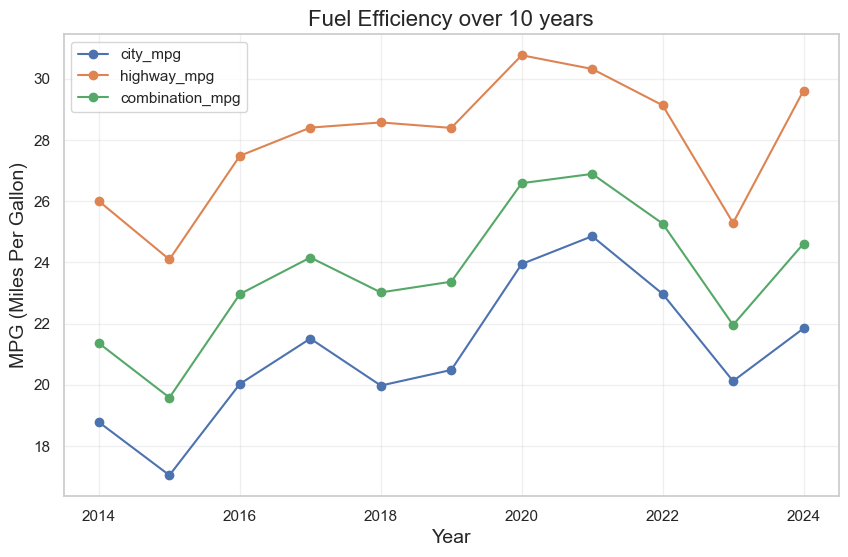

In [ ]:
# Calculate yearly trends by averaging MPG values for each year
yearly_trends = df_cleaned.groupby('year')[['city_mpg', 'highway_mpg', 'combination_mpg']].mean()

# Plot the trends
plt.figure(figsize=(10, 6))
for column in yearly_trends.columns:
    plt.plot(yearly_trends.index, yearly_trends[column], marker='o', label=column)

# Add titles, labels, grid, and legend
plt.title('Fuel Efficiency over 10 years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MPG (Miles Per Gallon)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Despite some fluctuations, all three categories show an overall improvement over the decade, highlighting progress in fuel efficiency technologies. The sharp drops in recent years could be due to temporary challenges or shifts in vehicle trends, but the recent recovery is a positive sign.

## **5.Conclusion**

### *Identify Fuel-Efficient Vehicles*
- When examining the top three vehicles in each class, it becomes clear that compact and midsize cars are leading the way in fuel efficiency. The Toyota Corolla Hybrid, a compact car, stands out with an impressive fuel economy of over 50 MPG. Similarly, the Honda Insight, a midsize car, also achieves remarkable fuel efficiency, exceeding 50 MPG. These vehicles, designed with fuel economy in mind, are ideal choices for those prioritizing gas mileage.
However, it's worth noting that many of the top-performing cars seem to be hybrids. While the Toyota Corolla Hybrid is explicitly labeled as such, most cars in the dataset lack this information, potentially skewing the comparison. This lack of clarity makes it challenging to fully assess how other factors this, contribute to fuel efficiency across different car categories.

- In the standard pickup truck category, the Honda Ridgeline comes out on top with just over 20 MPG. The difference in fuel efficiency between the top compact car and the top pickup truck is pretty striking. This shows that hybrids definitely have an edge when it comes to fuel efficiency, but it also highlights that things like the size of the vehicle and even the tire and wheel size play a big role in how much fuel a car uses..

- In the large car category, the Audi A8 comes out on top with over 25 MPG. For SUVs, trucks, and other larger vehicles, 25 MPG is generally considered to be a good or average consumption.

### *Analyze Key Factors Influencing Fuel Efficiency*
- **City_Mpg:** looking at the fuel consumption category bar graph,City driving consumes more compared to highway driving averaging 21 Mpg,this could be due to frequent acceleration and deceleration in traffic, prolonged idling in traffic jams, the use of air conditioning, and frequent short trips that don't allow the engine to warm up properly.

- **Highway Mpg:** highway driving seems to cover the most ground with lesser fuel average over 25 Mpg,this could be due to less stopping and driving at constant speed

- **Combination Mpg:** This category combines both city and highway driving, so it makes sense that the fuel efficiency for combination driving falls somewhere between the two

- **MPG VS No Cylinders:** Looking at the line chart, it’s clear that cars with more cylinders tend to consume more fuel. This makes sense because cars with larger engines, which often have more cylinders, are built for more power. And while more power is great for performance, it usually comes at the cost of fuel efficiency.
From my perspective, this trade-off between power and fuel efficiency is something many drivers have to consider. If you’re looking for a car that’s powerful, a higher-cylinder engine might be worth it. But if fuel economy is your priority, opting for a smaller engine with fewer cylinders could save you at the pump in the long run. It’s all about finding the right balance for your needs

- **MPG VS Displacement:** There is usually a correlation between engine displacement and the number of cylinders, typically, more cylinders mean a larger displacement. As a result, engines with higher displacement tend to consume more fuel, while those with smaller displacement generally use less fuel.However, with advancements in engine technology, some smaller engines, like turbocharged or hybrid engines, are bridging the gap between power and efficiency, making it easier to enjoy both performance and better fuel economy.

### *Class-Based Analysis*
- Larger vehicles, such as large cars, minivans, and pickup trucks, are typically heavier. Heavier vehicles require more energy to accelerate and maintain speed, especially in city driving where frequent stops and starts occur. This increases fuel consumption.

- Smaller vehicles, like compact cars and small station wagons, are lighter, meaning they need less power to move, which typically results in better fuel efficiency, particularly in urban settings.

### *Yearly trends*
- The line graph(Fuel efficiency over 10 years) shows a steady upward trend in fuel efficiency (MPG) over the 10-year period, with a noticeable peak in 2020–2021 followed by a sharp dip between 2021–2023.

- An explanation for the peak during 2020–2021 could be that, fewer people were driving due to the COVID-19 pandemic, and those who did were driving more efficiently—fewer traffic jams and less stop-and-go driving. The subsequent dip between 2021–2023 might be due to the return of normal traffic patterns, increased driving, and possibly a focus on larger, less fuel-efficient vehicles as people resumed their routines.